### Project Overview

This notebook demonstrates the creation, population and analysis of a relational database using SQLite within a Python environment. The purpose of this notebook is to preprocess, analyze and visualize user interaction data, for specific components while ensuring reproducibility and compliance with database setup requirements.


### Database Details

- **Database Name**: `activity_database.db`
- **Database Type**: SQLite (file-based relational database)
- **SQLite Version**: sqlite3
- **Tables Included**:
  - `activity_log`: Contains user activity details.
  - `component_codes`: Maps component identifiers to descriptive names.
  - `user_log`: Stores user-related metadata.


#### Software Requirements
- **Python Version**: 3.7 - 3.12
- **Environment**: Anaconda or standalone Python
- **Jupyter Notebook**

#### Libraries Used
- `pandas`: For data manipulation and preprocessing.
- `numpy`: For numerical operations.
- `sqlite3`: To create and interact with the SQLite database.
- `matplotlib`: For creating static visualizations.
- `seaborn`: For enhanced data visualization.

#### Dataset Files
Ensure the following CSV files are available in the specified paths:
- `ACTIVITY_LOG.csv`
- `COMPONENT_CODES.csv`
- `USER_LOG.csv`

---

### Database Creation and Population

This notebook contains all the necessary steps to set up and populate the SQLite database:

1. **Loading Datasets**:
   The datasets are loaded from CSV files and saved into SQLite using the following code:
   ```python
   conn = sqlite3.connect("activity_database.db")
   activity_log.to_sql("activity_log", conn, if_exists="replace", index=False)
   component_codes.to_sql("component_codes", conn, if_exists="replace", index=False)
   user_log.to_sql("user_log", conn, if_exists="replace", index=False)
   conn.close()
   ```

2. **Database Connection**:
   SQLite establishes a connection locally, using:
   ```python
   conn = sqlite3.connect("activity_database.db")
   ```
   Note: No host or port setup is required for SQLite as it is file-based.

3. **Database Schema**:
   The database includes three main tables, which are populated directly from the input CSV files:
   - `activity_log`
   - `component_codes`
   - `user_log`

4. **Reproducibility**:
   The code is designed to recreate the database from scratch, making it fully reproducible if the input files are provided.


### Steps to Execute

1. **Load and Preprocess Data**:
   Run the cells to load the datasets from their respective CSV files and clean them by removing duplicates, standardizing component names, and handling missing values.

2. **Create and Populate Database**:
   Execute the database setup cell to create the SQLite database and populate it with the cleaned data.

3. **Data Analysis**:
   Run the provided analysis cells to:
   - Calculate summary statistics.
   - Generate visualizations (e.g., correlation heatmaps, scatter plots).

4. **Outputs**:
   All outputs are generated within the notebook, including visualizations and statistical summaries.

---

### Additional Notes

- **Code Reusability**:
  The code is modular and can be adapted for other datasets with minimal changes.
- **Error Handling**:
  Proper error messages are displayed for missing files or failed database operations.
- **Documentation**:
  Comments are included within the code for better understanding of each step.

---

### Example Outputs

#### 1. Database Version
Use the following command to verify the SQLite version:
```python
import sqlite3
print(sqlite3.sqlite_version)
```

#### 2. Correlation Heatmap
A correlation heatmap is generated to identify relationships between components.

#### 3. Summary Statistics
Statistics such as mean, median, and mode are calculated and displayed for each component.

---

### Author

This notebook was created as part of the summative for the AP module to demonstrate the use of relational databases and data analysis in Python. 


In [2]:

# Importing the necessary libraries
import pandas as pd # Imports the pandas library
import numpy as np # Imports the numpy library
from scipy.stats import mode
import tkinter as tk # Imports the tkinter library
from tkinter import filedialog, messagebox # # Imports the fieldialog and messagebox modules from tkinter
import matplotlib.pyplot as plt 
from matplotlib.figure import Figure #Imports the Figure class from Matplotlib
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns # Imports the Seaborn library
import sqlite3 # Imports the sqlite3 library and SQLite does not require a host or port setup
print(" The version of sqlite3 is: " + sqlite3.sqlite_version)
import sys # Imports the sys library
if not (3, 7) <= sys.version_info[:2] <= (3, 12): # Checks if the current Python version is between 3.7 and 3.12 inclusive.
    raise RuntimeError("Python version must be between 3.7 and 3.12") # Creates a RuntimeError with the specified message if the Python version is outside the allowed range.

 The version of sqlite3 is: 3.45.3


In [3]:
# Loading the datasets and saving them into JSON and SQLite formats

try:
    activity_log = pd.read_csv(r'C:\Users\Ophel\ACTIVITY_LOG.csv')
    activity_log.to_json("activity_log.json", orient="records")  # Save as JSON
    print("Activity Log loaded and saved to JSON.")
except FileNotFoundError as e:
    print(f"Error loading ACTIVITY_LOG.csv: {e}")

try:
    component_codes = pd.read_csv(r'C:\Users\Ophel\COMPONENT_CODES.csv')
    component_codes.to_json("component_codes.json", orient="records")  # Save as JSON
    print("Component Codes loaded and saved to JSON.")
except FileNotFoundError as e:
    print(f"Error loading COMPONENT_CODES.csv: {e}")

try:
    user_log = pd.read_csv(r'C:\Users\Ophel\USER_LOG.csv')
    user_log.to_json("user_log.json", orient="records")  # Save as JSON
    print("User Log loaded and saved to JSON.")
except FileNotFoundError as e:
    print(f"Error loading USER_LOG.csv: {e}")

# Save data to SQLite
try:
    conn = sqlite3.connect("activity_database.db")
    activity_log.to_sql("activity_log", conn, if_exists="replace", index=False)
    component_codes.to_sql("component_codes", conn, if_exists="replace", index=False)
    user_log.to_sql("user_log", conn, if_exists="replace", index=False)
    conn.close()
    print("All data successfully saved to SQLite database.")
except Exception as e:
    print(f"Error saving data to SQLite: {e}")



Activity Log loaded and saved to JSON.
Component Codes loaded and saved to JSON.
User Log loaded and saved to JSON.
All data successfully saved to SQLite database.


In [4]:
# Check if columns exist before renaming
if 'User Full Name *Anonymized' in activity_log.columns:
    activity_log.rename(columns={'User Full Name *Anonymized': 'User_ID'}, inplace=True)
else:
    print("Column 'User Full Name *Anonymized' not found in activity_log!")

if 'User Full Name *Anonymized' in user_log.columns:
    user_log.rename(columns={'User Full Name *Anonymized': 'User_ID'}, inplace=True)
else:
    print("Column 'User Full Name *Anonymized' not found in user_log!")

# Check for required columns before processing
if 'Component' in activity_log.columns:
    # Removing unnecessary components
    activity_log = activity_log[~activity_log['Component'].isin(['System', 'Folder'])]
else:
    print("Column 'Component' not found in activity_log!")

# Fill missing values only for existing columns
if 'Date' in activity_log.columns:
    activity_log.fillna({"Date": "1970-01-01", "Component": "Unknown"}, inplace=True)
else:
    print("Column 'Date' not found in activity_log! Adding a placeholder column.")
    activity_log['Date'] = "1970-01-01"

if 'User_ID' in user_log.columns:
    user_log.fillna({"User_ID": "Unknown"}, inplace=True)
else:
    print("Column 'User_ID' not found in user_log!")

# Dropping rows with critical missing data
missing_columns = [col for col in ["User_ID", "Date"] if col not in activity_log.columns]
if not missing_columns:
    activity_log.dropna(subset=["User_ID", "Date"], inplace=True)
else:
    print(f"Critical columns missing from activity_log: {missing_columns}")



Column 'Date' not found in activity_log! Adding a placeholder column.


In [5]:

# Concatenating the datasets with unique indices
user_log = user_log.drop_duplicates(subset=['User_ID']) # Removing duplicate rows in the user_log DataFrame based on the User_ID column.
activity_log = activity_log.drop_duplicates(subset=['User_ID']) #Removes duplicate rows in the activity_log DataFrame based on the User_ID column.
combined_data = pd.concat([user_log.set_index('User_ID'), activity_log.set_index('User_ID')], axis=1).reset_index() # Combing the user_log and activity_log DataFrames into a single Panda DataFrame, called combined_data.
combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()] # Removing duplicate columns from the combined_data DataFrame.

# Debugging combined_data
print("Combined Data Preview:")
print(combined_data.head())  # Check the first few rows
print("-------------------------------------------------------")
print(combined_data.info())  # Check data types and missing values



Combined Data Preview:
   User_ID              Date       Time   Component   Action  \
0      129  17/11/2023 00:00   00:00:00      Course   Viewed   
1       26  10/11/2023 00:00   00:00:01        Quiz  Updated   
2       86  20/12/2023 00:00   00:00:02  Assignment   Viewed   
3       94  23/10/2023 00:00   00:00:08  Assignment   Viewed   
4      147  23/10/2023 00:00   00:00:10  Assignment   Viewed   

              Target  
0            Content  
1           Response  
2         Assignment  
3  Submission_status  
4         Assignment  
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User_ID    152 non-null    int64 
 1   Date       152 non-null    object
 2   Time       152 non-null    object
 3   Component  152 non-null    object
 4   Action     152 non-null    object
 5   Target     152 n

In [6]:
# Adding the month and reshaping the data
try:
    # Convert 'Date' column to datetime format
    if 'Date' in combined_data.columns:
        combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce', dayfirst=True)
    else:
        combined_data['Date'] = pd.NaT  # Set missing dates to NaT

    # Fill missing dates with a default value
    combined_data['Date'] = combined_data['Date'].fillna(pd.Timestamp('1970-01-01'))

    # Extract 'Month' and 'Semester_Week'
    combined_data['Month'] = combined_data['Date'].dt.month
    combined_data['Semester_Week'] = combined_data['Date'].dt.isocalendar().week

    # Debugging step: check for unique components
    if 'Component' in combined_data.columns:
        combined_data['Component'] = combined_data['Component'].str.strip()
        print("Unique Components:", combined_data['Component'].unique())

    # Fill missing values in 'Component' with 'Unknown'
    combined_data['Component'] = combined_data['Component'].fillna("Unknown")

    # Ensure no critical missing data remains
    combined_data = combined_data.dropna(subset=["User_ID", "Date"])

    # Create the interaction_counts pivot table
    if {'User_ID', 'Component', 'Month'}.issubset(combined_data.columns):
        interaction_counts = combined_data.pivot_table(
            index='User_ID',
            columns=['Component', 'Month'],
            aggfunc='size',
            fill_value=0
        )
        print("Interaction Counts Preview:")
        print(interaction_counts.head())
    else:
        raise ValueError("Required columns for pivot table are missing.")

    # Success message
    messagebox.showinfo("Success", "Data reshaped successfully!")

except Exception as e:
    # Error message for debugging
    messagebox.showerror("Error", f"Failed to transform data: {e}")
    print(f"Error details: {e}")


Unique Components: ['Course' 'Quiz' 'Assignment' 'Lecture' 'Manual' 'Study_material' 'Test'
 'Book' 'Survey']
Interaction Counts Preview:
Component Assignment       Book Course          Lecture    Manual    Quiz     \
Month             10 11 12   10     9  10 11 12      10 11     9  11   10 11   
User_ID                                                                        
1                  0  0  0    0      0  1  0  0       0  0      0  0    0  0   
2                  1  0  0    0      0  0  0  0       0  0      0  0    0  0   
3                  1  0  0    0      0  0  0  0       0  0      0  0    0  0   
4                  0  0  0    1      0  0  0  0       0  0      0  0    0  0   
5                  0  0  0    0      0  1  0  0       0  0      0  0    0  0   

Component Study_material Survey Test  
Month                 10     10   12  
User_ID                               
1                      0      0    0  
2                      0      0    0  
3                      0  

In [7]:
# Calculating summary statistics for components
summary_stats = {}  # To store monthly statistics (mean, mode, median) for each component.
semester_stats = {}  # To store semester-wide statistics (mean, mode, median) for each component.

# List of components to calculate statistics for
components = ['Quiz', 'Lecture', 'Assignment', 'Attendance', 'Survey']

# Debugging: Inspect components and interaction_counts
print("Components in interaction_counts:", interaction_counts.columns.get_level_values(0).unique())
print("Components being checked:", components)

try:
    # Loop over components and calculate statistics
    for component in components:
        if component in interaction_counts.columns.get_level_values(0):
            # Extract data for the component
            comp_data_month = interaction_counts[component]  # Month-wise data
            comp_data_semester = comp_data_month.sum(axis=1)  # Semester totals

            # Monthly statistics
            summary_stats[component] = {
                'mean_month': comp_data_month.mean(axis=0),  # Vectorized mean calculation
                'mode_month': comp_data_month.mode(axis=0).iloc[0] if not comp_data_month.mode(axis=0).empty else None,  # Handle empty mode
                'median_month': comp_data_month.median(axis=0),  # Vectorized median calculation
            }

            # Semester statistics
            semester_stats[component] = {
                'mean_semester': comp_data_semester.mean(),  # Overall mean
                'mode_semester': comp_data_semester.mode().iloc[0] if not comp_data_semester.mode().empty else None,  # Handle empty mode
                'median_semester': comp_data_semester.median(),  # Overall median
            }

    # Display results in readable format
    print("Summary Statistics for Each Month:")
    for component, stats in summary_stats.items():
        print(f"\nComponent: {component}")
        print("Monthly Mean:\n", stats['mean_month'])
        print("Monthly Mode:\n", stats['mode_month'])
        print("Monthly Median:\n", stats['median_month'])
        print("------------------------------------")

    print("\nSummary Statistics for the Entire Semester:")
    for component, stats in semester_stats.items():
        print(f"\nComponent: {component}")
        print(f"Mean (Semester): {stats['mean_semester']}")
        print(f"Mode (Semester): {stats['mode_semester']}")
        print(f"Median (Semester): {stats['median_semester']}")
        print("------------------------------------")

except Exception as e:
    print(f"Error during statistics calculation: {e}")


Components in interaction_counts: Index(['Assignment', 'Book', 'Course', 'Lecture', 'Manual', 'Quiz',
       'Study_material', 'Survey', 'Test'],
      dtype='object', name='Component')
Components being checked: ['Quiz', 'Lecture', 'Assignment', 'Attendance', 'Survey']
Summary Statistics for Each Month:

Component: Quiz
Monthly Mean:
 Month
10    0.013158
11    0.006579
dtype: float64
Monthly Mode:
 Month
10    0
11    0
Name: 0, dtype: int64
Monthly Median:
 Month
10    0.0
11    0.0
dtype: float64
------------------------------------

Component: Lecture
Monthly Mean:
 Month
10    0.032895
11    0.039474
dtype: float64
Monthly Mode:
 Month
10    0
11    0
Name: 0, dtype: int64
Monthly Median:
 Month
10    0.0
11    0.0
dtype: float64
------------------------------------

Component: Assignment
Monthly Mean:
 Month
10    0.125000
11    0.039474
12    0.072368
dtype: float64
Monthly Mode:
 Month
10    0
11    0
12    0
Name: 0, dtype: int64
Monthly Median:
 Month
10    0.0
11    0.0
12  

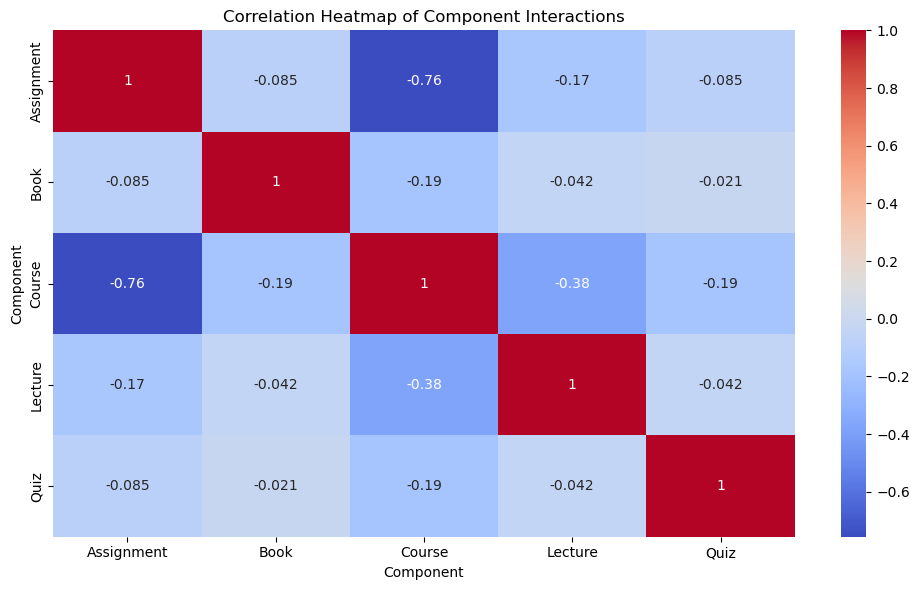

In [8]:
# OUTPUT CORRELATION
corr_components = ['Assignment', 'Quiz', 'Lecture', 'Book', 'Project', 'Course']
corr_data = combined_data[combined_data['Component'].isin(corr_components)]
correlation_table = corr_data.pivot_table(index='User_ID', columns='Component', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_table.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Component Interactions')
plt.tight_layout()
plt.show()


In [9]:
import tkinter as tk
from tkinter import filedialog, messagebox, Toplevel, Text
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


class DataApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Data Processing Application")

        # Initialize variables
        self.activity_log = None
        self.component_codes = None
        self.user_log = None
        self.processed_data = None
        self.interaction_counts = None

        # Create GUI elements
        self.create_widgets()

    def create_widgets(self):
        # Load Data Buttons
        tk.Button(self.root, text="Load Activity Log", command=self.load_activity_log).grid(row=0, column=0, padx=10, pady=5)
        tk.Button(self.root, text="Load Component Codes", command=self.load_component_codes).grid(row=1, column=0, padx=10, pady=5)
        tk.Button(self.root, text="Load User Log", command=self.load_user_log).grid(row=2, column=0, padx=10, pady=5)

        # Process Data Button
        tk.Button(self.root, text="Process Data", command=self.process_data).grid(row=3, column=0, padx=10, pady=5)

        # Save Processed Data
        tk.Button(self.root, text="Save Processed Data", command=self.save_processed_data).grid(row=4, column=0, padx=10, pady=5)

        # Visualization Section
        self.graph_frame = tk.Frame(self.root)
        self.graph_frame.grid(row=0, column=1, rowspan=5, padx=10, pady=5)

        # Visualization Buttons
        tk.Button(self.root, text="Generate Correlation Heatmap", command=self.plot_correlation_heatmap).grid(row=5, column=0, padx=10, pady=5)
        tk.Button(self.root, text="Plot User-Component Correlation", command=self.plot_user_component_correlation).grid(row=6, column=0, padx=10, pady=5)

        # Button for Summary Statistics
        tk.Button(self.root, text="Show Statistics Table", command=self.show_statistics_table).grid(row=7, column=0, padx=10, pady=5)
    
    def load_activity_log(self):
        filepath = filedialog.askopenfilename(title="Select Activity Log CSV")
        if filepath:
            try:
                self.activity_log = pd.read_csv(filepath)
                messagebox.showinfo("Success", "Activity Log Loaded Successfully!")
            except Exception as e:
                messagebox.showerror("Error", f"Failed to load Activity Log: {e}")

    def load_component_codes(self):
        filepath = filedialog.askopenfilename(title="Select Component Codes CSV")
        if filepath:
            try:
                self.component_codes = pd.read_csv(filepath)
                messagebox.showinfo("Success", "Component Codes Loaded Successfully!")
            except Exception as e:
                messagebox.showerror("Error", f"Failed to load Component Codes: {e}")

    def load_user_log(self):
        filepath = filedialog.askopenfilename(title="Select User Log CSV")
        if filepath:
            try:
                self.user_log = pd.read_csv(filepath)
                messagebox.showinfo("Success", "User Log Loaded Successfully!")
            except Exception as e:
                messagebox.showerror("Error", f"Failed to load User Log: {e}")

    def process_data(self):
        try:
            if self.activity_log is None or self.user_log is None:
                messagebox.showerror("Error", "Please load all required files first!")
                return
            
            # Rename columns
            self.activity_log.rename(columns={"User Full Name *Anonymized": "User_ID"}, inplace=True)
            self.user_log.rename(columns={"User Full Name *Anonymized": "User_ID"}, inplace=True)

            # Remove unnecessary components
            self.activity_log = self.activity_log[~self.activity_log["Component"].isin(["System", "Folder"])]

            # Concatenate datasets
            self.user_log = self.user_log.drop_duplicates(subset=["User_ID"])
            self.activity_log = self.activity_log.drop_duplicates(subset=["User_ID"])
            combined_data = pd.concat([self.user_log.set_index("User_ID"), 
                                        self.activity_log.set_index("User_ID")], axis=1).reset_index()
            combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]

            # Add Month column
            combined_data["Date"] = pd.to_datetime(combined_data["Date"], errors="coerce", dayfirst=True)
            combined_data["Month"] = combined_data["Date"].dt.month

            # Reshape data
            self.interaction_counts = combined_data.pivot_table(
                index="User_ID", columns=["Component", "Month"], aggfunc="size", fill_value=0
            )

            self.processed_data = combined_data
            messagebox.showinfo("Success", "Data Processed Successfully!")
        except Exception as e:
            messagebox.showerror("Error", f"Data Processing Failed: {e}")

    def save_processed_data(self):
        if self.processed_data is None:
            messagebox.showerror("Error", "No processed data to save!")
            return
        
        filepath = filedialog.asksaveasfilename(defaultextension=".csv", filetypes=[("CSV files", "*.csv")])
        if filepath:
            try:
                self.processed_data.to_csv(filepath, index=False)
                messagebox.showinfo("Success", "Processed Data Saved Successfully!")
            except Exception as e:
                messagebox.showerror("Error", f"Failed to save processed data: {e}")

    def plot_correlation_heatmap(self):
        if self.interaction_counts is None:
            messagebox.showerror("Error", "No data available for plotting!")
            return

        try:
            # Filter components for correlation analysis
            corr_components = ["Assignment", "Quiz", "Lecture", "Book", "Project", "Course"]
            corr_data = self.processed_data[self.processed_data["Component"].isin(corr_components)]
            correlation_table = corr_data.pivot_table(index="User_ID", columns="Component", aggfunc="size", fill_value=0)

            # Generate heatmap
            fig = Figure(figsize=(6, 4))
            ax = fig.add_subplot(111)
            sns.heatmap(correlation_table.corr(), annot=True, cmap="coolwarm", ax=ax)
            ax.set_title("Correlation Heatmap of Component Interactions")

            # Clear previous graph and display new graph
            for widget in self.graph_frame.winfo_children():
                widget.destroy()
            canvas = FigureCanvasTkAgg(fig, master=self.graph_frame)
            canvas.draw()
            canvas.get_tk_widget().pack()
        except Exception as e:
            messagebox.showerror("Error", f"Failed to plot correlation heatmap: {e}")

    def plot_user_component_correlation(self):
        if self.processed_data is None:
            messagebox.showerror("Error", "No data available for plotting!")
            return

        try:
            # Filter data for selected components
            components = ["Assignment", "Quiz", "Lecture", "Book", "Project", "Course"]
            data = self.processed_data[self.processed_data["Component"].isin(components)]

            # Generate scatter plot
            fig = Figure(figsize=(8, 6))
            ax = fig.add_subplot(111)
            sns.scatterplot(data=data, x="User_ID", y="Component", ax=ax, hue="Component", legend="full")
            ax.set_title("User-Component Correlation")
            ax.set_xlabel("User ID")
            ax.set_ylabel("Component")

            # Clear previous graph and display new graph
            for widget in self.graph_frame.winfo_children():
                widget.destroy()
            canvas = FigureCanvasTkAgg(fig, master=self.graph_frame)
            canvas.draw()
            canvas.get_tk_widget().pack()
        except Exception as e:
            messagebox.showerror("Error", f"Failed to plot user-component correlation: {e}")


    def show_statistics_table(self):
        if self.processed_data is None or self.interaction_counts is None:
            messagebox.showerror("Error", "No processed data available!")
            return

        try:
            components = ['Quiz', 'Lecture', 'Assignment', 'Attendance', 'Survey']
            stats_window = Toplevel(self.root)
            stats_window.title("Summary Statistics")
            stats_text = Text(stats_window, wrap='word', width=100, height=30)
            stats_text.pack(padx=10, pady=10)

            # Calculate Statistics
            stats_text.insert('end', "Summary Statistics for Each Month:\n")
            for component in components:
                if component in self.interaction_counts.columns.get_level_values(0):
                    comp_data_month = self.interaction_counts[component]
                    stats_text.insert('end', f"\nComponent: {component}\n")
                    stats_text.insert('end', f"Monthly Mean:\n{comp_data_month.mean(axis=0)}\n")
                    stats_text.insert('end', f"Monthly Mode:\n{comp_data_month.mode(axis=0).iloc[0]}\n")
                    stats_text.insert('end', f"Monthly Median:\n{comp_data_month.median(axis=0)}\n")

            stats_text.insert('end', "\nSummary Statistics for Entire Semester:\n")
            for component in components:
                if component in self.interaction_counts.columns.get_level_values(0):
                    comp_data_semester = self.interaction_counts[component].sum(axis=1)
                    stats_text.insert('end', f"\nComponent: {component}\n")
                    stats_text.insert('end', f"Semester Mean: {comp_data_semester.mean()}\n")
                    stats_text.insert('end', f"Semester Mode: {comp_data_semester.mode().iloc[0]}\n")
                    stats_text.insert('end', f"Semester Median: {comp_data_semester.median()}\n")

            stats_text.config(state='disabled')  # Make the text read-only
        except Exception as e:
            messagebox.showerror("Error", f"Failed to generate statistics: {e}")


# Run the application
if __name__ == "__main__":
    root = tk.Tk()
    app = DataApp(root)
    root.mainloop()
